In [73]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, hilbert, fftconvolve
%config Completer.use_jedi = False

In [125]:
_, replica = np.loadtxt("/Users/willquinn/Desktop/ref.dat", unpack=True)
x, data = np.loadtxt("/Users/willquinn/Desktop/signal.dat", unpack=True, delimiter=',')

In [126]:
replica = replica/np.sqrt(np.dot(replica, replica))

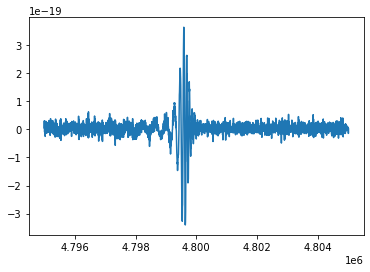

In [127]:
plt.plot(x, data)

/Users/willquinn/opt/anaconda3/envs/my_root_env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


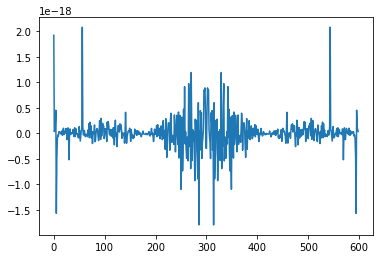

In [128]:
nfft = len(replica)
plt.plot(fft.fft(data, nfft))

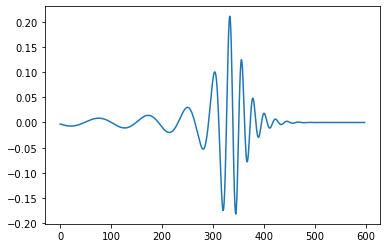

In [129]:
plt.plot(replica)

/Users/willquinn/opt/anaconda3/envs/my_root_env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


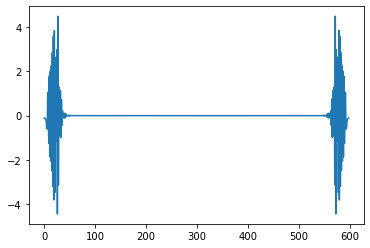

In [130]:
plt.plot(fft.fft(replica, nfft))

1402 2000 599


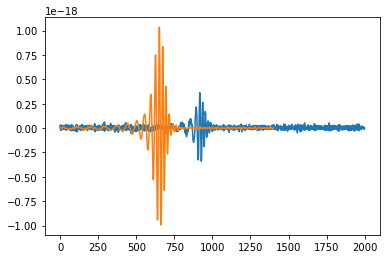

In [131]:
plt.plot(data)
c = np.convolve(replica, data, mode='valid')
print(len(c), len(data), len(replica))
plt.plot(c)

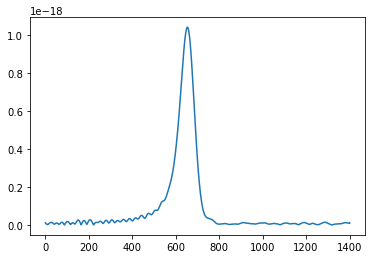

In [132]:
plt.plot(abs(hilbert(c)))
#plt.plot(abs(hilbert(data)))

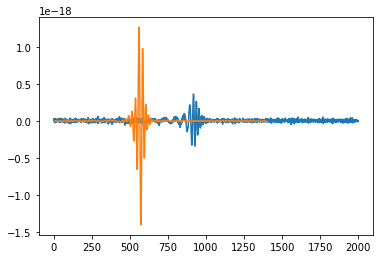

In [133]:
d = np.correlate(data, replica, mode='valid')
plt.plot(data)
plt.plot(d)

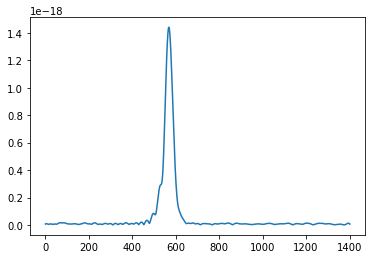

In [134]:
plt.plot(abs(hilbert(d)))

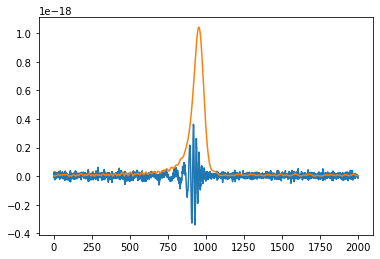

In [137]:
f = fftconvolve(data, replica, mode='same')
plt.plot(data)
plt.plot(abs(hilbert(f)))


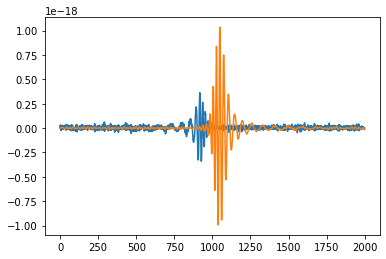

In [85]:
plt.plot(data)
plt.plot(np.flip(f))

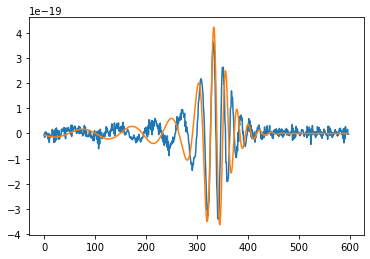

In [100]:
i = 585
plt.plot(data[i:i+len(replica)])
#plt.plot(f[600:1100])
plt.plot(replica/0.5e18)

In [139]:
x, data = np.loadtxt("/Users/willquinn/Desktop/simulation.dat", unpack=True)
_, template = np.loadtxt("/Users/willquinn/Desktop/ref.dat", unpack=True)

/Users/willquinn/opt/anaconda3/envs/my_root_env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


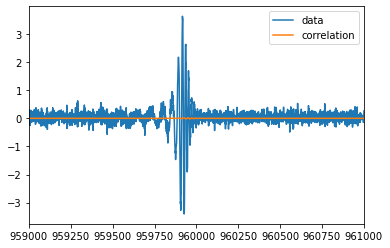

In [142]:
signal = data/np.sqrt(np.dot(data, data))
replica = template/np.sqrt(np.dot(template, template))
f = fftconvolve(signal, replica, mode='same')
#f_ = f/np.sqrt(np.dot(f,f))
plt.plot(data/1e-19, label='data')
plt.plot((hilbert(f)), label='correlation')
plt.xlim(0.959e6, 0.961e6)
plt.legend()

In [122]:
peaks, _ = find_peaks(abs(hilbert(f)), height=0.0025, distance=int(replica.size/2))

In [123]:
peaks

array([ 959953, 2251796, 2305375, 4085288, 4445575, 4881879])

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

The flux of anti-neutrinos per fission as a function of energy is given by:  
$\phi(E_{\bar\nu}) = exp\big(\sum_{i=0}^5 \alpha_iE_{\bar\nu}^i\big)$

In [ ]:
# The coefficiencts for this flux are:
A = 4.367
B = -4.577
C = 2.1
D = -0.529
F = 0.062
G = -0.003

The number of fissions per second is goven by:  
$ N_{fissions} = \frac{P_{reactor}}{E_{fission}}$,  
where $P_{reactor}$ is the thermal power of the reactor and $E_{fission}$ is the energy released per fission

Text(0, 0.5, '$\\bar\\nu$ Flux /fission')

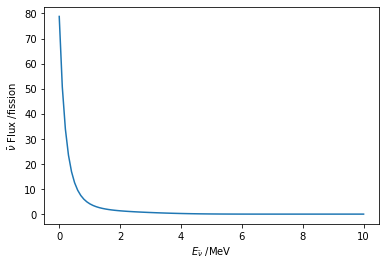

In [80]:
def flux(x,c):
    temp = np.zeros_like(x)
    for j in range(len(c)):
        temp += c[j]*x**(j)
    return np.exp(temp)
E = np.linspace(0, 10, 100)
fl = flux(E, [A,B,C,D,F,G]) 
plt.plot(E, fl)
#plt.yscale('log')
plt.xlabel(r'$E_{\bar\nu}$ /MeV')
plt.ylabel(r'$\bar\nu$ Flux /fission')

The energy threshold for IBD is 1.806MeV. The cross-section can be roughly estimated to be:  
$\sigma(IBD) \approx 10^{-43}\frac{E_{\bar\nu}^2}{MeV}$

The rate of IBD events in a dector of mass $M_D$ with molar mass $m_r$ is then:  
> $\Gamma$ = Flux x cross-section * $N_{target} = N_{target}\frac{N_{fissions}}{4\pi R^2} \int_{1.8}^{10}\sigma\phi dE_{\bar\nu}$  
>> $\Gamma = \frac{M_DN_A}{m_r}\frac{P_{reactor}}{4\pi R^2E_{fission}}\int_{1.8}^{10}\sigma\phi dE_{\bar\nu}$

$P_{reactor}$ = 150 MW, and $E_{fission}$ = 200MeV  
$N_{fissions} = \frac{150}{200}\frac{10^6}{1.602\times10^{-13}}$

In [88]:
N_fis = 150/200 * (1e6/1e-13) /1.602
print(r'N_fissions =',N_fis, 'per sercond')

N_fissions = 4.681647940074906e+18 per sercond


In [ ]:
def integrand(x,c):
    temp = np.zeros_like(x)
    for j in range(len(c)):
        temp += c[j]*x**(j)
    return np.exp(temp)*x**2

In [90]:
integral, _ = integrate.quad(integrand, 1.8,10, args=([A,B,C,D,F,G]))
xsec = 1e-43*integral
print('integral =',xsec)

integral = 1.5349954741312544e-42


In [92]:
#define a factor
factor = N_fis*xsec*6.02*1e23/(4*np.pi)
print('factor =', factor)

factor = 0.3442646878128963


The rate is then:
> $\Gamma = \frac{M_D}{m_r}\frac{0.344}{R^2}$  

But $R$ is in units of cm so in m:  
> $\Gamma = \frac{M_D}{m_r}\frac{0.344\times10^{-4}}{R^2}$  

In [94]:
factor/0.018 * 1e-4

0.0019125815989605355

In the case of water $m_r$ = 0.018 so the $\Gamma$ becomes:  
> $\Gamma = \frac{0.002 M_D}{R^2}$ 